In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser




# a

In [79]:
date_parser = lambda dates: parser.parse(dates, dayfirst=True)
data_time  = pd.read_csv("SP500_weekly_Jan1988_Nov2018.csv",parse_dates = ["Date"], 
                         index_col='Date', date_parser=date_parser)

In [80]:
def plot_close(datas):
    plt.figure(figsize= (30,10))
    for data in datas:
        plt.plot(data)
    plt.grid()
    


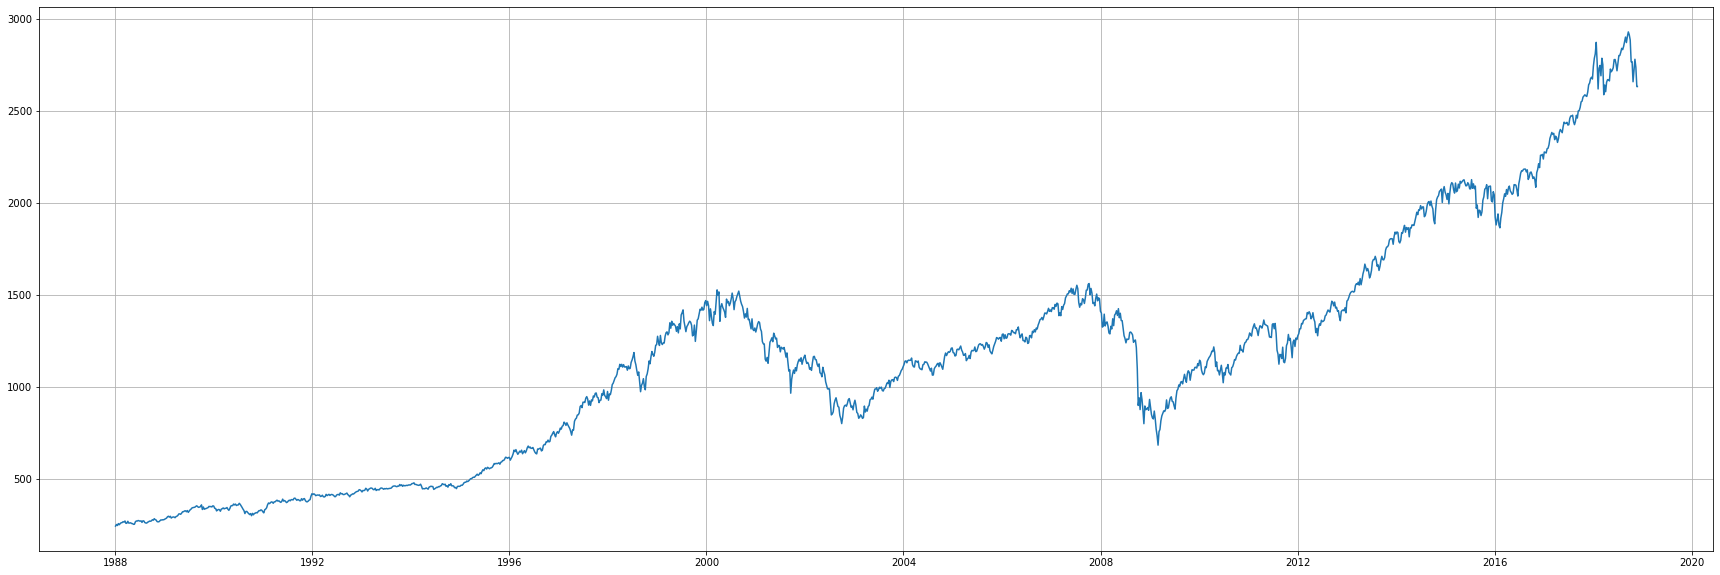

In [82]:
plot_close([data_time])



# b

In [83]:
data = pd.read_csv("SP500_weekly_Jan1988_Nov2018.csv")
data.index = data.index + 1
data.drop("Date",axis=1, inplace = True)
data = data["Adj Close"]


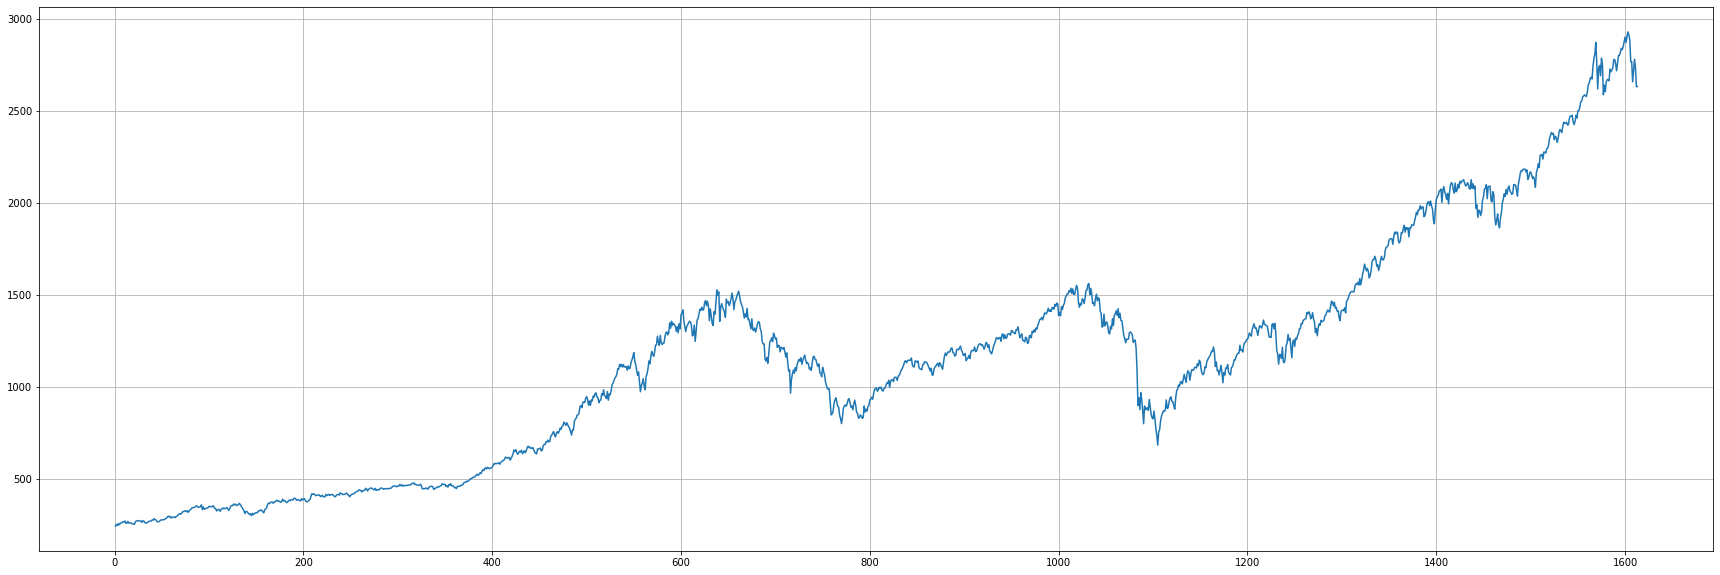

In [84]:
plot_close([data])

In [85]:
data[1513]

2238.830078

In [86]:
data

1        243.399994
2        252.050003
3        246.500000
4        257.070007
5        250.960007
6        257.630005
7        261.609985
8        262.459991
9        267.299988
10       264.940002
11       271.119995
12       258.510010
13       258.890015
14       269.429993
15       259.769989
16       260.140015
17       261.329987
18       257.480011
19       256.779999
20       253.020004
21       253.419998
22       266.450012
23       271.260010
24       270.679993
25       273.779999
26       271.779999
27       270.019989
28       272.049988
29       263.500000
30       272.019989
           ...     
1584    2727.719971
1585    2712.969971
1586    2721.330078
1587    2734.620117
1588    2779.030029
1589    2779.659912
1590    2754.879883
1591    2718.370117
1592    2759.820068
1593    2801.310059
1594    2801.830078
1595    2818.820068
1596    2840.350098
1597    2833.280029
1598    2850.129883
1599    2874.689941
1600    2901.520020
1601    2871.679932
1602    2904.979980


In [87]:
data[1513]

2238.830078

In [88]:
data[len(data)-100]


2238.830078

In [89]:
data[:-100]

1        243.399994
2        252.050003
3        246.500000
4        257.070007
5        250.960007
6        257.630005
7        261.609985
8        262.459991
9        267.299988
10       264.940002
11       271.119995
12       258.510010
13       258.890015
14       269.429993
15       259.769989
16       260.140015
17       261.329987
18       257.480011
19       256.779999
20       253.020004
21       253.419998
22       266.450012
23       271.260010
24       270.679993
25       273.779999
26       271.779999
27       270.019989
28       272.049988
29       263.500000
30       272.019989
           ...     
1484    2096.070068
1485    2071.219971
1486    2037.410034
1487    2102.949951
1488    2129.899902
1489    2161.739990
1490    2175.030029
1491    2173.600098
1492    2182.870117
1493    2184.050049
1494    2183.870117
1495    2169.040039
1496    2179.979980
1497    2127.810059
1498    2139.159912
1499    2164.689941
1500    2168.270020
1501    2153.739990
1502    2132.979980


In [90]:
def naive_drift(time_series,length):
    """Naice forecast with drift
    Allow the forecasts to increase or decrease over time, 
    where the amount of change over time (called the drift) 
    is set to be the average change seen in the historical data. 
    
    Arg:
        time_series: (pandas.Series)
        length: (int)  
    return:
        s: (pandas.Series)
    """
    
    if length <=  len(time_series):
        y_init = time_series[1]
        y_t = time_series[len(time_series) - length] # y1513

        ts_changed = []

        for i in range(length):
            T = len(time_series) - length + i + 1
            y_t = y_t + 1 * ((y_t - y_init) / (T - 1))
            ts_changed.append(y_t)

        s = pd.concat([time_series[:-length], pd.Series(ts_changed)])
        s.index = range(1,len(s)+1)
        return s
    else:
        print("")

In [91]:
drift = naive_drift(data,100)

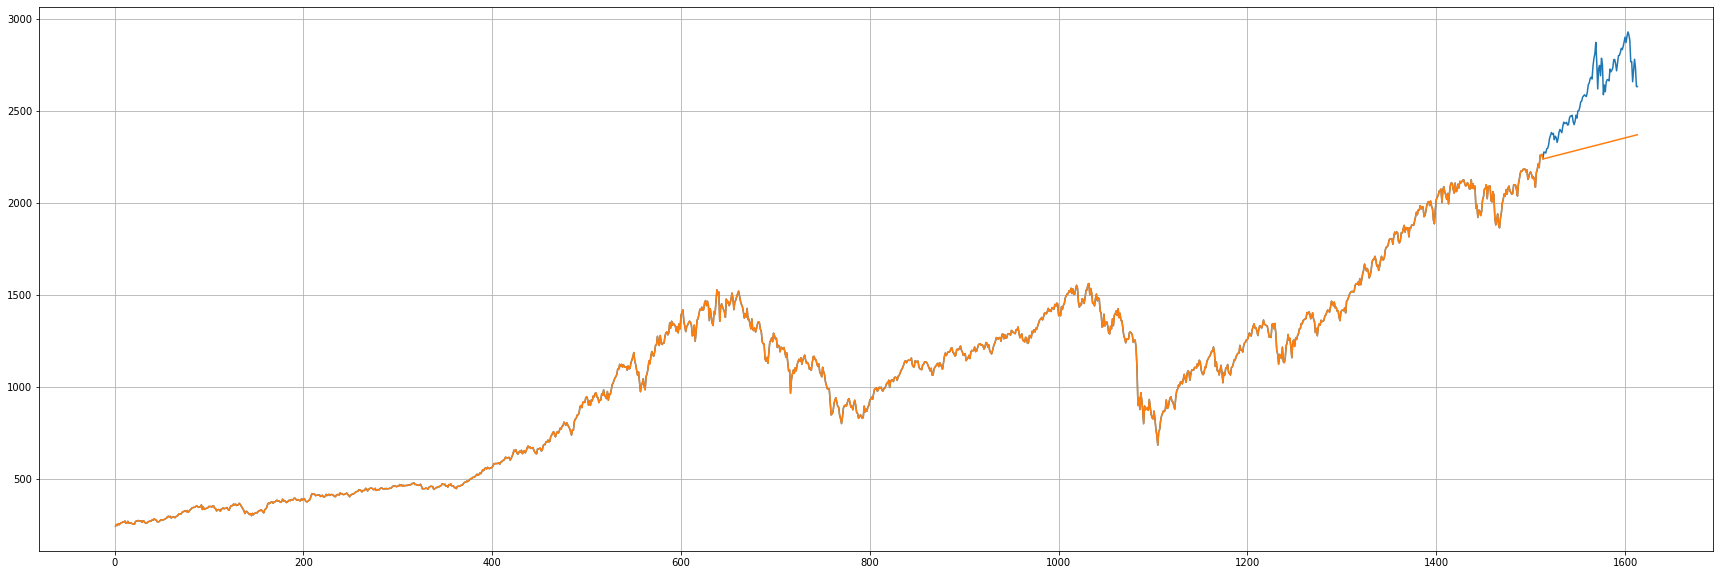

In [92]:
plot_close([data, drift])

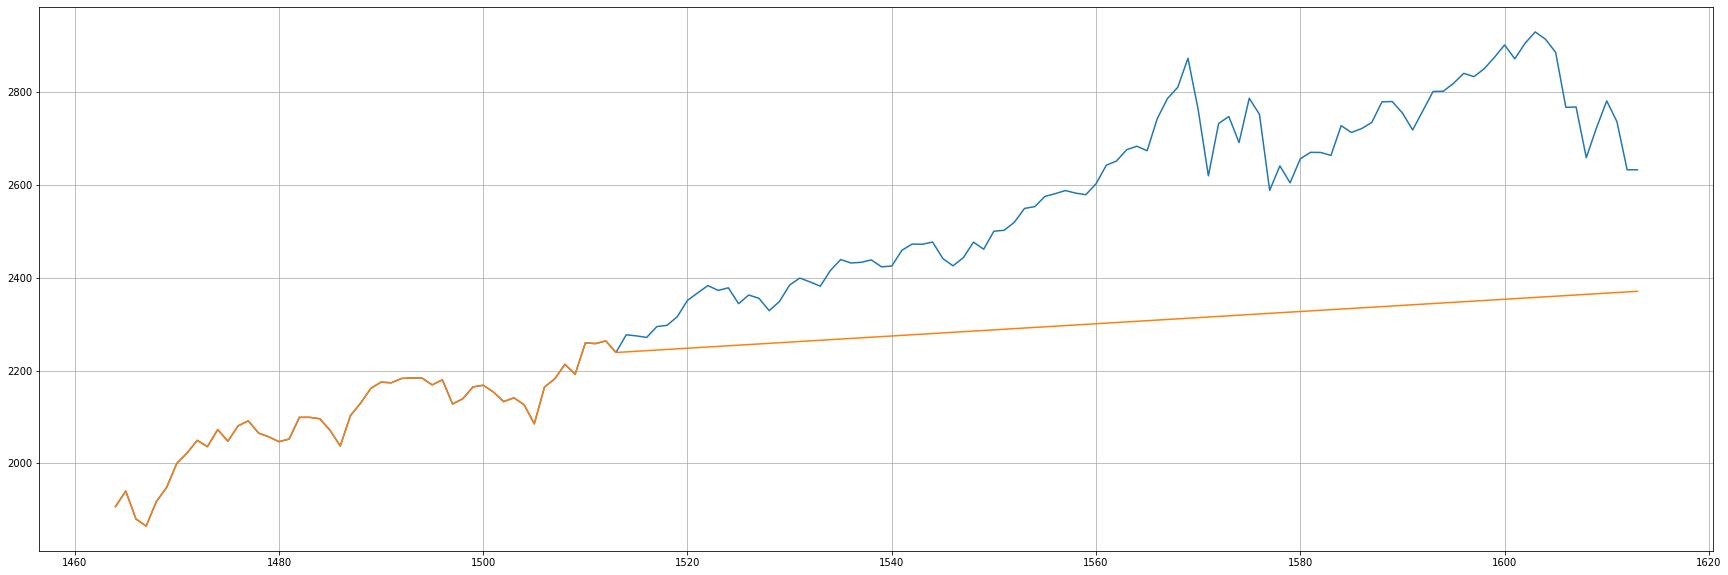

In [93]:
plot_close([data[-150:], drift[-150:]])

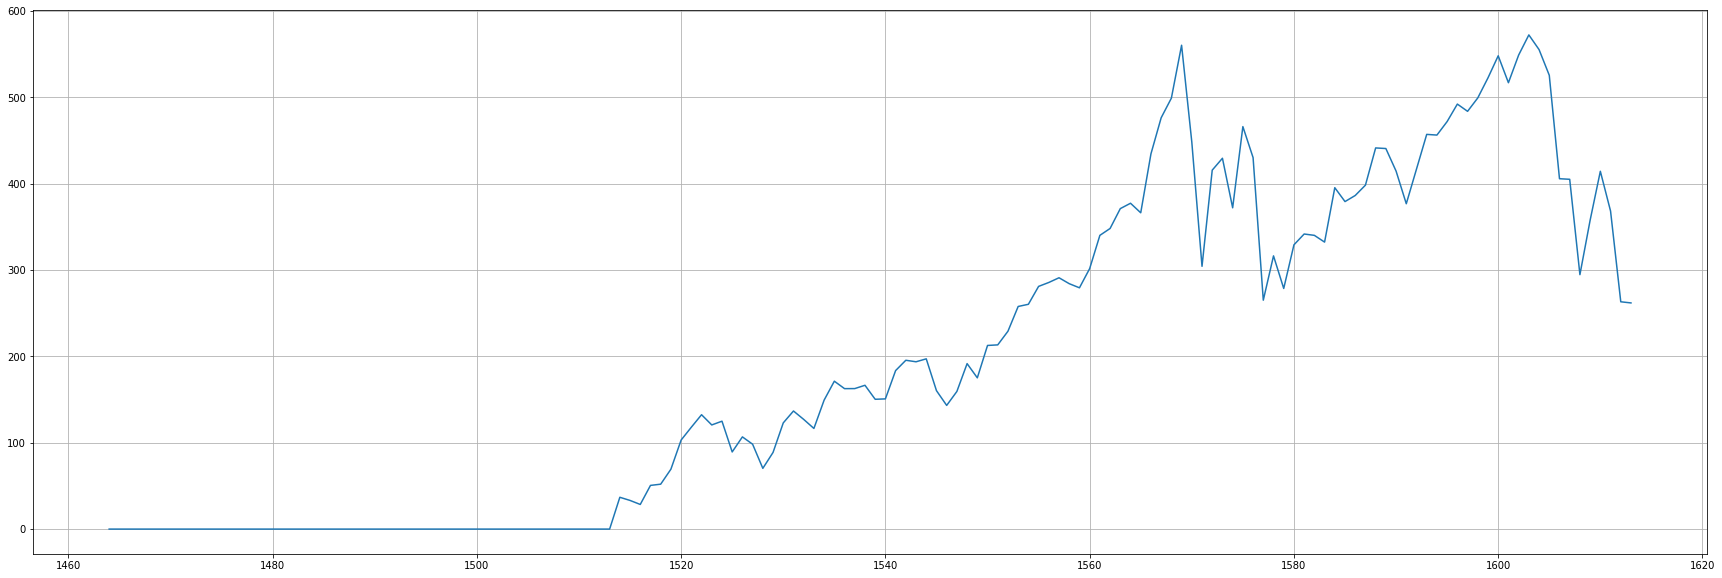

In [94]:
plot_close([(data - drift)[-150:]])

In [56]:
def rmse(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = [(y_true[i] - y_pred[i]) for i in range(len(y_true))]
    diff =  np.array(diff)[~np.isnan(diff)]
    mse = 0
    for i in range(len(diff)):
        mse += diff[i] ** 2
    return np.sqrt(mse/len(diff))


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [57]:
mean_absolute_percentage_error(data[-100:], drift[-100:])

10.939869697053602

In [58]:
rmse(data[-100:], drift[-100:])

329.1939099863024

# c

In [64]:
def cma_n(ts,n):
    result = []
    if n % 2 == 0:
        for index in np.arange( n , len(ts)-n ):
#        print(index)
            sums = 0.5*( ts[ index - n] + ts[ index + n ]) + ts[index - (n-1):index+n].sum() 
            mean = sums / 2 / n
            result.append(mean)
        
    nan = [np.nan]*n
    result = nan+result+nan
    return result

In [70]:
data.index = range(0, len(data))

data_4 = pd.Series(cma_n(data,4), index = range(1, len(data)+1))

In [72]:
data_4

1               NaN
2               NaN
3               NaN
4               NaN
5        255.453749
6        257.753123
7        260.097498
8        261.726248
9        262.311873
10       263.544998
11       264.167498
12       263.907499
13       263.389376
14       262.550001
15       261.187502
16       259.948127
17       259.263126
18       258.735001
19       259.266878
20       260.643753
21       262.080627
22       263.752502
23       265.473751
24       267.490625
25       269.309999
26       270.288122
27       270.629370
28       270.114369
29       268.759993
30       267.157492
           ...     
1584    2702.221863
1585    2716.737488
1586    2728.893112
1587    2737.638123
1588    2743.078766
1589    2750.606277
1590    2761.158783
1591    2771.452530
1592    2780.547531
1593    2787.731293
1594    2797.035675
1595    2812.758789
1596    2831.385025
1597    2844.639389
1598    2855.484375
1599    2868.859360
1600    2880.389343
1601    2888.259338
1602    2886.339966


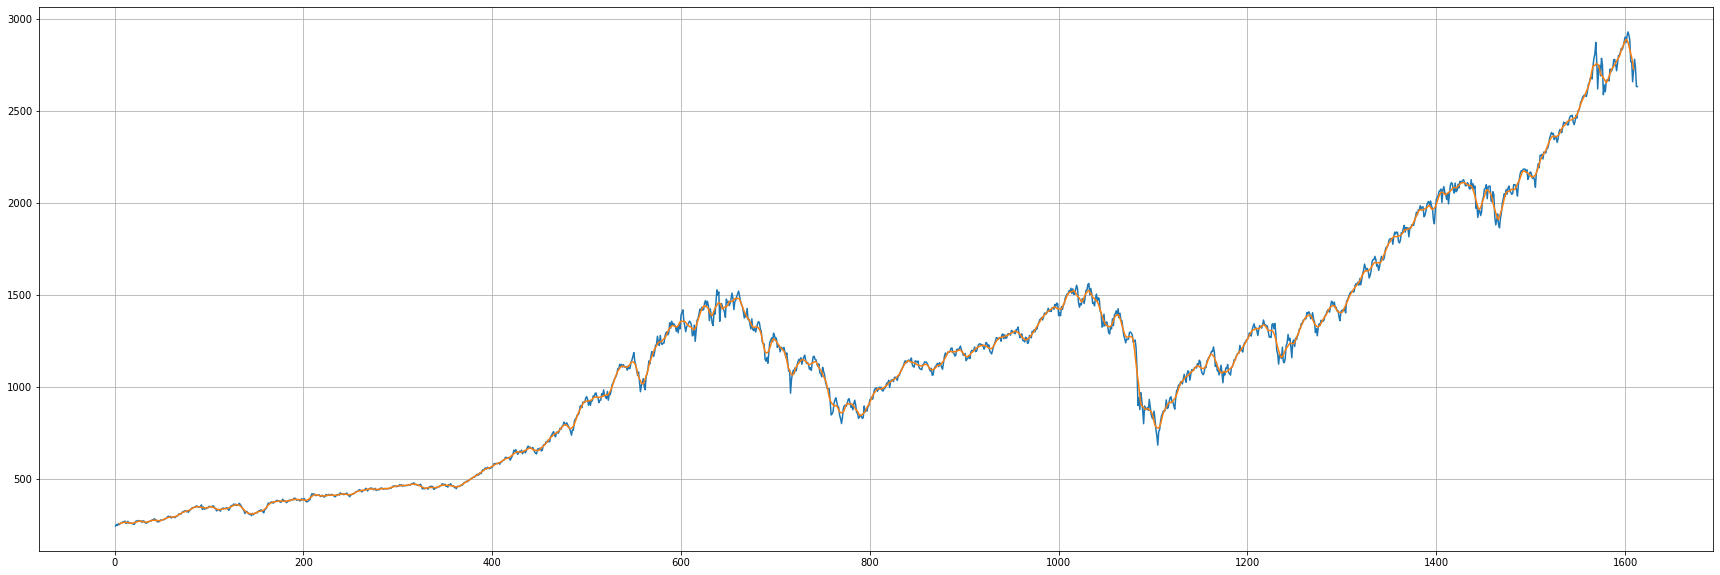

In [95]:
plot_close([data, data_4])

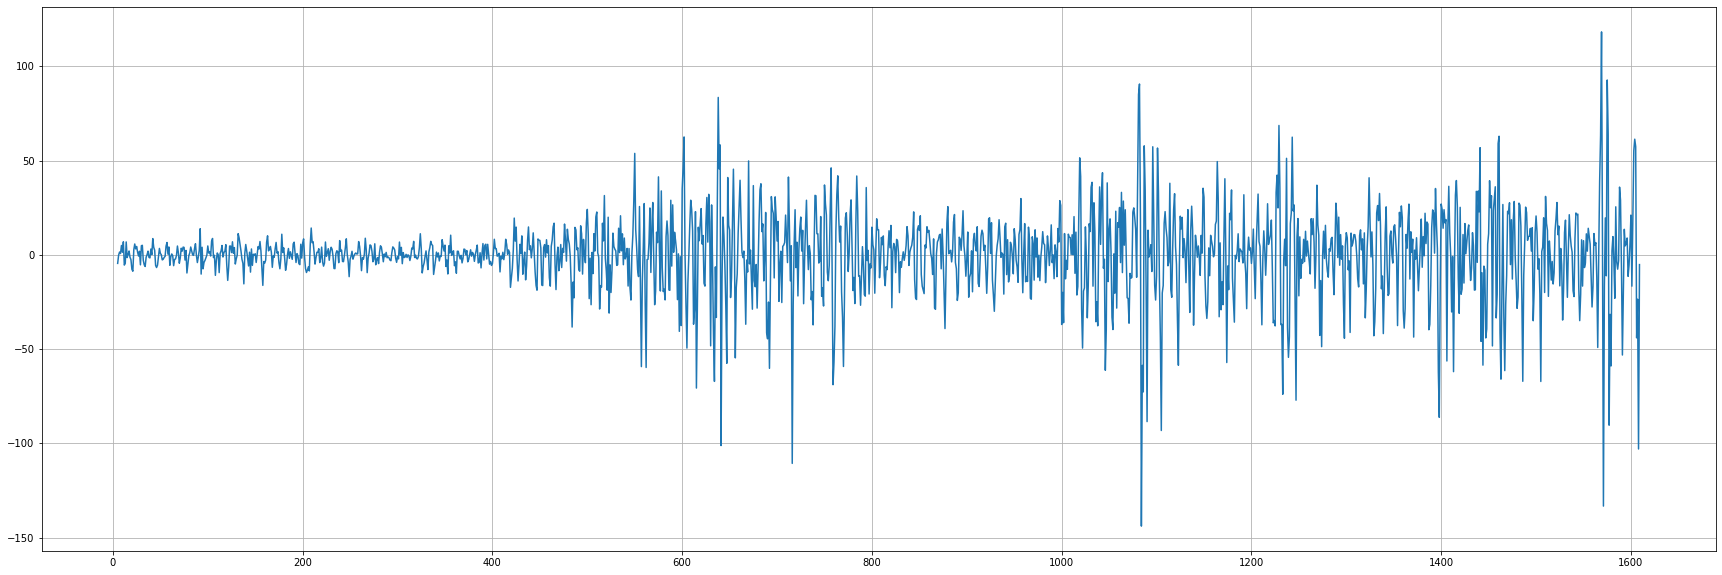

In [96]:
plot_close([data-data_4])

# d

In [110]:
def returns(ts):
    """
    """
    r = []
    for i in range(len(ts)-1):
        temp = np.log(ts[i+1] / ts[i]) 
        r.append(temp)
    return pd.Series(r,index = range(1, len(r)+1))

In [112]:
data.index = range(0, len(data))
return_data = returns(data)

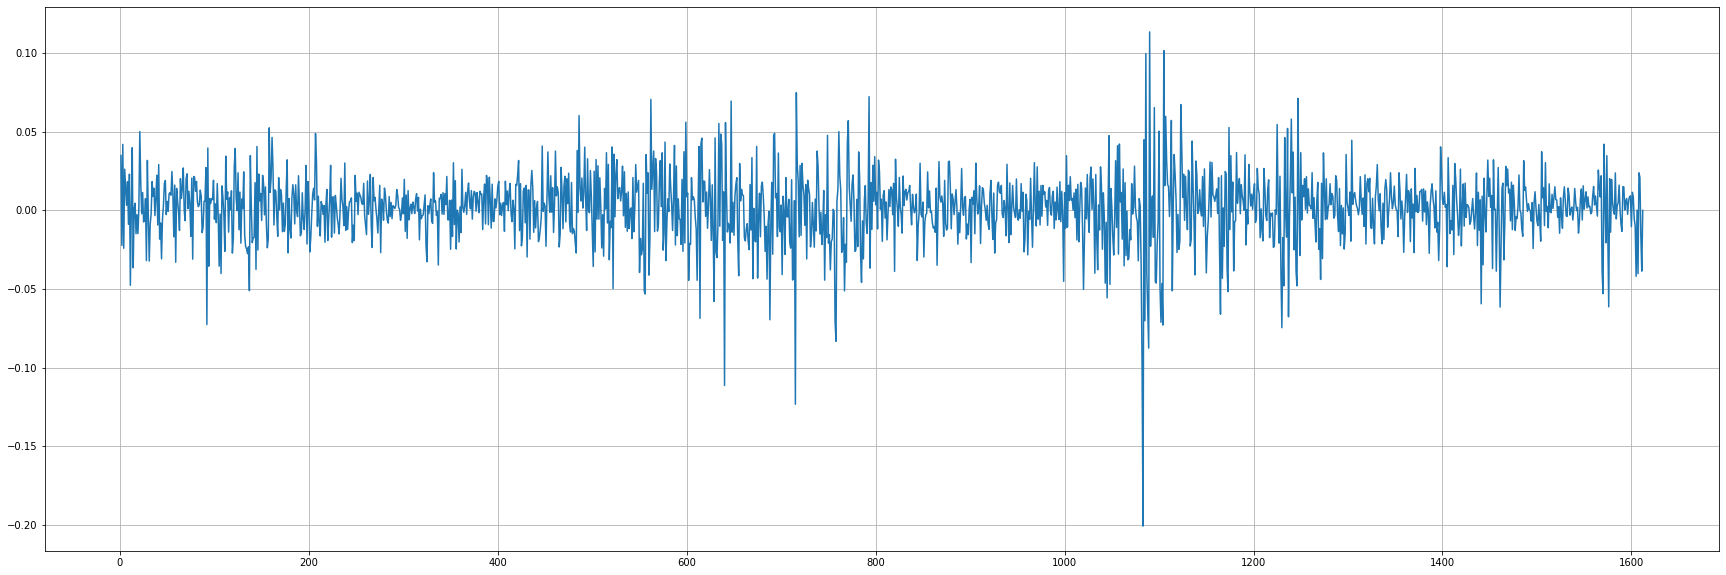

In [114]:
plot_close([return_data])

# e